In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [103]:
df_2 = pd.read_excel('cardekho_details.xlsx')

In [104]:
df_3 = pd.read_excel('olx_details.xlsx')

In [105]:
df = pd.concat([df_2,df_3],axis=0)

In [106]:
df.head()

,Unnamed: 0,Vehicle_Name,Registration_Year,Make,Model,Trim,KMs_Driven,No_of_Owners,Transmission,Fuel_Type,Body_Type,Registration,Mileage,Location,Selling_Price
0,0,Audi A6 2.0 Tdi Premium Plus,2014,Audi,A6 2.0 Tdi Premium Plus,Not available,"95,000",Second,Automatic,Diesel,Not available,TN39,17.68,Coimbatore,1850000
1,1,Maruti Celerio Zxi Mt Bsiv,2018,Maruti,Celerio Zxi Mt Bsiv,Not available,"25,020",First,Manual,Petrol,Not available,TN45,23.1,Coimbatore,540000
2,2,Volkswagen Vento Diesel Highline,2013,Volkswagen,Vento Diesel Highline,Not available,"1,61,800",First,Manual,Diesel,Not available,TN33,20.54,Coimbatore,550000
3,3,Maruti Baleno 1.2 Zeta,2016,Maruti,Baleno 1.2 Zeta,Not available,"62,950",First,Manual,Petrol,Not available,TN58,21.4,Coimbatore,650000
4,4,Jeep Compass Model S 4x4 Diesel At,2021,Jeep,Compass Model S 4x4 Diesel At,Not available,"39,850",First,Automatic,Diesel,Not available,TN39,14.9,Coimbatore,3150000


In [107]:
df = df.drop(['Unnamed: 0'],axis=1)

In [108]:
df.shape

(499, 14)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 215
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle_Name       499 non-null    object
 1   Registration_Year  499 non-null    int64 
 2   Make               499 non-null    object
 3   Model              499 non-null    object
 4   Trim               499 non-null    object
 5   KMs_Driven         499 non-null    object
 6   No_of_Owners       499 non-null    object
 7   Transmission       499 non-null    object
 8   Fuel_Type          499 non-null    object
 9   Body_Type          499 non-null    object
 10  Registration       442 non-null    object
 11  Mileage            499 non-null    object
 12  Location           499 non-null    object
 13  Selling_Price      499 non-null    object
dtypes: int64(1), object(13)
memory usage: 58.5+ KB


In [110]:
df.columns

Index(['Vehicle_Name', 'Registration_Year', 'Make', 'Model', 'Trim',
       'KMs_Driven', 'No_of_Owners', 'Transmission', 'Fuel_Type', 'Body_Type',
       'Registration', 'Mileage', 'Location', 'Selling_Price'],
      dtype='object')

In [111]:
df['Make'].unique()

array(['Audi', 'Maruti', 'Volkswagen', 'Jeep', 'Ford', 'Toyota', 'Bmw',
       'Mahindra', 'Nissan', 'Hyundai', 'Honda', 'Skoda', 'Mercedes-benz',
       'Volvo', 'Jaguar', 'Renault', 'Mini', 'Tata', 'Kia', 'Chevrolet',
       'Land', 'Fiat', 'Mitsubishi', 'Mercedes-Benz', 'Mg', 'Bajaj',
       'Force'], dtype=object)

In [112]:
df['Make'] = df['Make'].replace('Mercedes-benz', 'Mercedes-Benz')

In [113]:
df['Make'] = df['Make'].replace('Maruti', 'MarutiSuzuki')

In [114]:
df['Make'].unique()

array(['Audi', 'MarutiSuzuki', 'Volkswagen', 'Jeep', 'Ford', 'Toyota',
       'Bmw', 'Mahindra', 'Nissan', 'Hyundai', 'Honda', 'Skoda',
       'Mercedes-Benz', 'Volvo', 'Jaguar', 'Renault', 'Mini', 'Tata',
       'Kia', 'Chevrolet', 'Land', 'Fiat', 'Mitsubishi', 'Mg', 'Bajaj',
       'Force'], dtype=object)

In [115]:
df['No_of_Owners'] = df['No_of_Owners'].replace(1, 'First')

In [116]:
df['No_of_Owners'] = df['No_of_Owners'].replace(2, 'Second')

In [117]:
df['No_of_Owners'] = df['No_of_Owners'].replace(3, 'Third')

In [118]:
df['No_of_Owners'] = df['No_of_Owners'].replace(4, 'Fourth')

In [119]:
df['No_of_Owners'] = df['No_of_Owners'].replace('1st', 'First')

In [120]:
df['No_of_Owners'] = df['No_of_Owners'].replace('2nd', 'Second')

In [121]:
df['No_of_Owners'] = df['No_of_Owners'].replace('3rd', 'Third')

In [122]:
df['No_of_Owners'].unique()

array(['Second', 'First', 'Third', 'Fourth'], dtype=object)

In [123]:
df['Transmission'] = df['Transmission'].replace('MANUAL', 'Manual')

In [124]:
df['Transmission'] = df['Transmission'].replace('AUTOMATIC', 'Automatic')

In [125]:
df['Transmission'] = df['Transmission'].replace('--', 'Not available')

In [126]:
df['Transmission'].unique()

array(['Automatic', 'Manual', 'Not available'], dtype=object)

In [127]:
df['Fuel_Type'] = df['Fuel_Type'].replace('PETROL', 'Petrol')

In [128]:
df['Fuel_Type'] = df['Fuel_Type'].replace('ELECTRIC', 'Electric')

In [129]:
df['Fuel_Type'] = df['Fuel_Type'].replace('DIESEL', 'Diesel')

In [130]:
df['Fuel_Type'] = df['Fuel_Type'].replace('--', 'Not available')

In [131]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'LPG', 'Electric', 'Not available',
       'CNG & HYBRIDS'], dtype=object)

In [132]:
df['Location'] = df['Location'].str.replace('[','').str.replace(']','').str.replace(' ','')

C:\Users\anish\AppData\Local\Temp/ipykernel_5936/2395908615.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Location'] = df['Location'].str.replace('[','').str.replace(']','').str.replace(' ','')


In [133]:
df['Location'].unique()

array(['Coimbatore'], dtype=object)

In [134]:
s=[]
import math
for i in df['Selling_Price'].astype(str).str.replace(',','').astype(float):
    s.append(math.floor(i))
    

In [135]:
df['Selling_Price'] = s

In [136]:
k=[]
for i in df['KMs_Driven'].astype(str).str.replace(',','').astype(float):
    k.append(math.floor(i))

In [137]:
df['KMs_Driven'] = k

In [138]:
df.columns

Index(['Vehicle_Name', 'Registration_Year', 'Make', 'Model', 'Trim',
       'KMs_Driven', 'No_of_Owners', 'Transmission', 'Fuel_Type', 'Body_Type',
       'Registration', 'Mileage', 'Location', 'Selling_Price'],
      dtype='object')

In [140]:
df1 = df.drop(['Vehicle_Name','Trim','Body_Type', 'Registration', 'Mileage'],axis=1)

In [141]:
df1.head()

,Registration_Year,Make,Model,KMs_Driven,No_of_Owners,Transmission,Fuel_Type,Location,Selling_Price
0,2014,Audi,A6 2.0 Tdi Premium Plus,95000,Second,Automatic,Diesel,Coimbatore,1850000
1,2018,MarutiSuzuki,Celerio Zxi Mt Bsiv,25020,First,Manual,Petrol,Coimbatore,540000
2,2013,Volkswagen,Vento Diesel Highline,161800,First,Manual,Diesel,Coimbatore,550000
3,2016,MarutiSuzuki,Baleno 1.2 Zeta,62950,First,Manual,Petrol,Coimbatore,650000
4,2021,Jeep,Compass Model S 4x4 Diesel At,39850,First,Automatic,Diesel,Coimbatore,3150000


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 215
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Registration_Year  499 non-null    int64 
 1   Make               499 non-null    object
 2   Model              499 non-null    object
 3   KMs_Driven         499 non-null    int64 
 4   No_of_Owners       499 non-null    object
 5   Transmission       499 non-null    object
 6   Fuel_Type          499 non-null    object
 7   Location           499 non-null    object
 8   Selling_Price      499 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 39.0+ KB


In [157]:
df_1 = pd.read_excel('df_coimbatore.xlsx').iloc[0:1000]

In [158]:
df_2 = pd.read_excel('df_chennai.xlsx').iloc[0:1000]

In [159]:
df_3 = pd.read_excel('df_banglore.xlsx').iloc[0:1110]

In [160]:
df_4 = pd.read_excel('df_Kochi.xlsx')

In [161]:
df_5 = pd.read_excel('df_Hyderabadi.xlsx').iloc[0:1000]

In [162]:
df_6 = pd.read_excel('df_Visakhapatnam.xlsx').iloc[0:1000]

In [163]:
df2 = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6],axis=0)

In [164]:
df2.head()

,Unnamed: 0,Make,Model,Registration_Year,Mileage,Fuel_Type,No_of_Owners,Transmission,Location,Selling_Price
0,0,Maruti,Maruti Suzuki Omni 8 SEATER,2007,153000,Petrol,Fourth,Manual,Coimbatore,155000
1,1,Ford,Ford Ikon 1.4 TDCi DuraTorq,2009,118000,Diesel,Second,Manual,Coimbatore,215000
2,2,Renault,Renault Duster 85 PS RXL,2013,132000,Diesel,Second,Manual,Coimbatore,510000
3,3,Honda,Honda Amaze 1.2 S AT i-VTEC,2020,18899,Petrol,First,Automatic,Coimbatore,820000
4,4,Renault,Renault Duster 85 PS RXE,2013,76000,Diesel,Second,Manual,Coimbatore,560000


In [165]:
df2['KMs_Driven'] = df2['Mileage']

In [166]:
df2 = df2.drop(['Mileage','Unnamed: 0'],axis=1)

In [246]:
df3 = pd.concat([df1,df2],axis=0)

In [247]:
df3.head()

,Registration_Year,Make,Model,KMs_Driven,No_of_Owners,Transmission,Fuel_Type,Location,Selling_Price
0,2014,Audi,A6 2.0 Tdi Premium Plus,95000,Second,Automatic,Diesel,Coimbatore,1850000
1,2018,MarutiSuzuki,Celerio Zxi Mt Bsiv,25020,First,Manual,Petrol,Coimbatore,540000
2,2013,Volkswagen,Vento Diesel Highline,161800,First,Manual,Diesel,Coimbatore,550000
3,2016,MarutiSuzuki,Baleno 1.2 Zeta,62950,First,Manual,Petrol,Coimbatore,650000
4,2021,Jeep,Compass Model S 4x4 Diesel At,39850,First,Automatic,Diesel,Coimbatore,3150000


In [248]:
df3['Selling_Price'] = df3['Selling_Price'].astype(str)

In [249]:
a = df3['Selling_Price'].str.replace(',','').str.rsplit(' ',0).to_list()

In [250]:
p=[]
for i in range(5499):
    if len(a[i])==1:
        p.append(a[i][0])
    else:
        p.append(a[i][1])

In [251]:
df3['Selling_Price'] = p

In [252]:
df3['Selling_Price'] = df3['Selling_Price'].astype(int)

In [253]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5499 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Registration_Year  5499 non-null   int64 
 1   Make               5499 non-null   object
 2   Model              5499 non-null   object
 3   KMs_Driven         5499 non-null   int64 
 4   No_of_Owners       5499 non-null   object
 5   Transmission       5499 non-null   object
 6   Fuel_Type          5499 non-null   object
 7   Location           5499 non-null   object
 8   Selling_Price      5499 non-null   int32 
dtypes: int32(1), int64(2), object(6)
memory usage: 408.1+ KB


In [254]:
df3.head()

,Registration_Year,Make,Model,KMs_Driven,No_of_Owners,Transmission,Fuel_Type,Location,Selling_Price
0,2014,Audi,A6 2.0 Tdi Premium Plus,95000,Second,Automatic,Diesel,Coimbatore,1850000
1,2018,MarutiSuzuki,Celerio Zxi Mt Bsiv,25020,First,Manual,Petrol,Coimbatore,540000
2,2013,Volkswagen,Vento Diesel Highline,161800,First,Manual,Diesel,Coimbatore,550000
3,2016,MarutiSuzuki,Baleno 1.2 Zeta,62950,First,Manual,Petrol,Coimbatore,650000
4,2021,Jeep,Compass Model S 4x4 Diesel At,39850,First,Automatic,Diesel,Coimbatore,3150000


In [255]:
df3['Make'] = df3['Make'].str.replace('mg','MG').str.replace('MarutiSuzuki','Maruti').str.replace('Skoda','SKODA').str.replace('Bmw','BMW').str.replace('Mg','MG')

In [256]:
df3['Make'].unique()

array(['Audi', 'Maruti', 'Volkswagen', 'Jeep', 'Ford', 'Toyota', 'BMW',
       'Mahindra', 'Nissan', 'Hyundai', 'Honda', 'SKODA', 'Mercedes-Benz',
       'Volvo', 'Jaguar', 'Renault', 'Mini', 'Tata', 'Kia', 'Chevrolet',
       'Land', 'Fiat', 'Mitsubishi', 'MG', 'Bajaj', 'Force', 'Datsun',
       'Isuzu', 'HM'], dtype=object)

In [257]:
df3['No_of_Owners'] = df3['No_of_Owners'].str.replace('Add','Second')

In [258]:
df3['No_of_Owners'].unique()

array(['Second', 'First', 'Third', 'Fourth'], dtype=object)

In [259]:
df3['Transmission'] = df3['Transmission'].str.replace('Second Owner','Manual').str.replace('AMT','Automatic')

In [260]:
df3['Transmission'].unique()

array(['Automatic', 'Manual', 'Not available'], dtype=object)

In [261]:
df3['Location'].unique()

array(['Coimbatore', 'Chennai', 'Bangalore', 'Kochi', 'Hyderabad',
       'Visakhapatnam'], dtype=object)

In [278]:
df3['Fuel_Type'].value_counts()

Petrol           2729
Diesel           2685
Petrol + Lpg       52
Electric           12
Petrol + Cng        9
Hybrid              5
LPG                 4
Not available       2
CNG & HYBRIDS       1
Name: Fuel_Type, dtype: int64

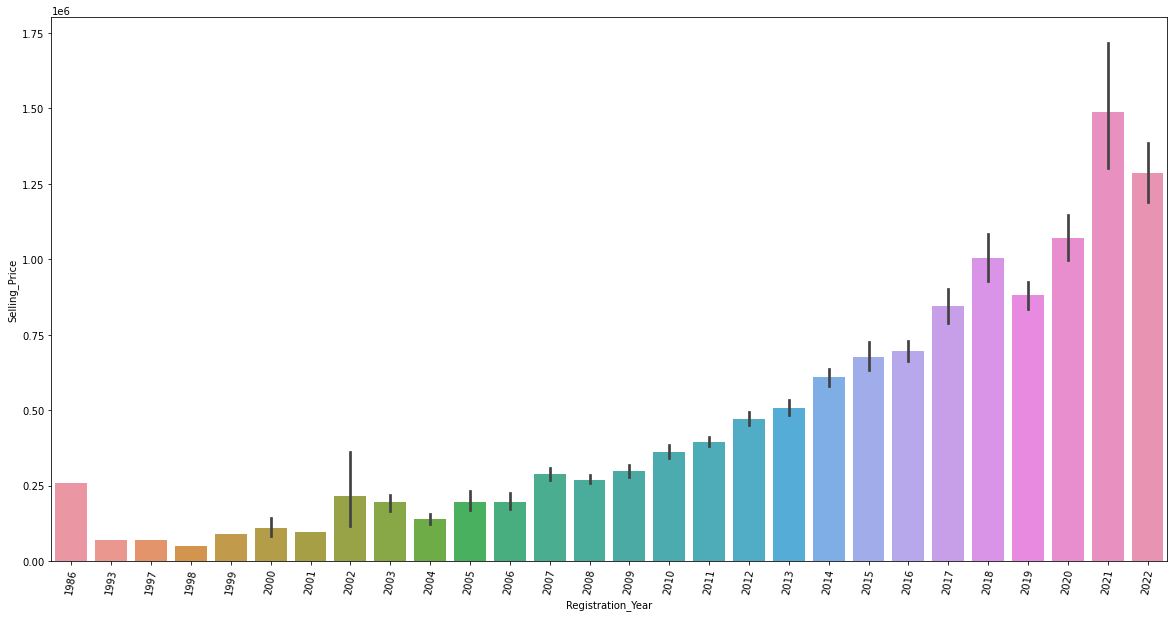

In [264]:
plt.figure(figsize=(20,10))
sns.barplot(x='Registration_Year',y='Selling_Price',data=df3.sort_values('Registration_Year'))
plt.xticks(rotation=80)
plt.show()

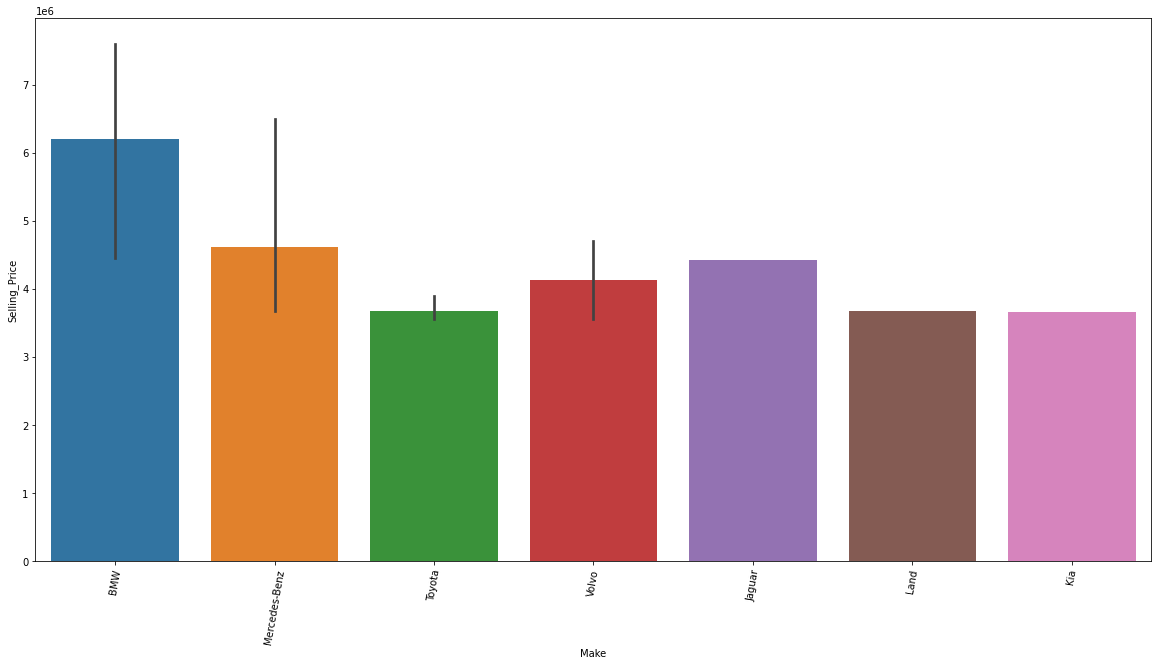

In [265]:
plt.figure(figsize=(20,10))
sns.barplot(x='Make',y='Selling_Price',data=df3.nlargest(30, 'Selling_Price'))
plt.xticks(rotation=80)
plt.show()

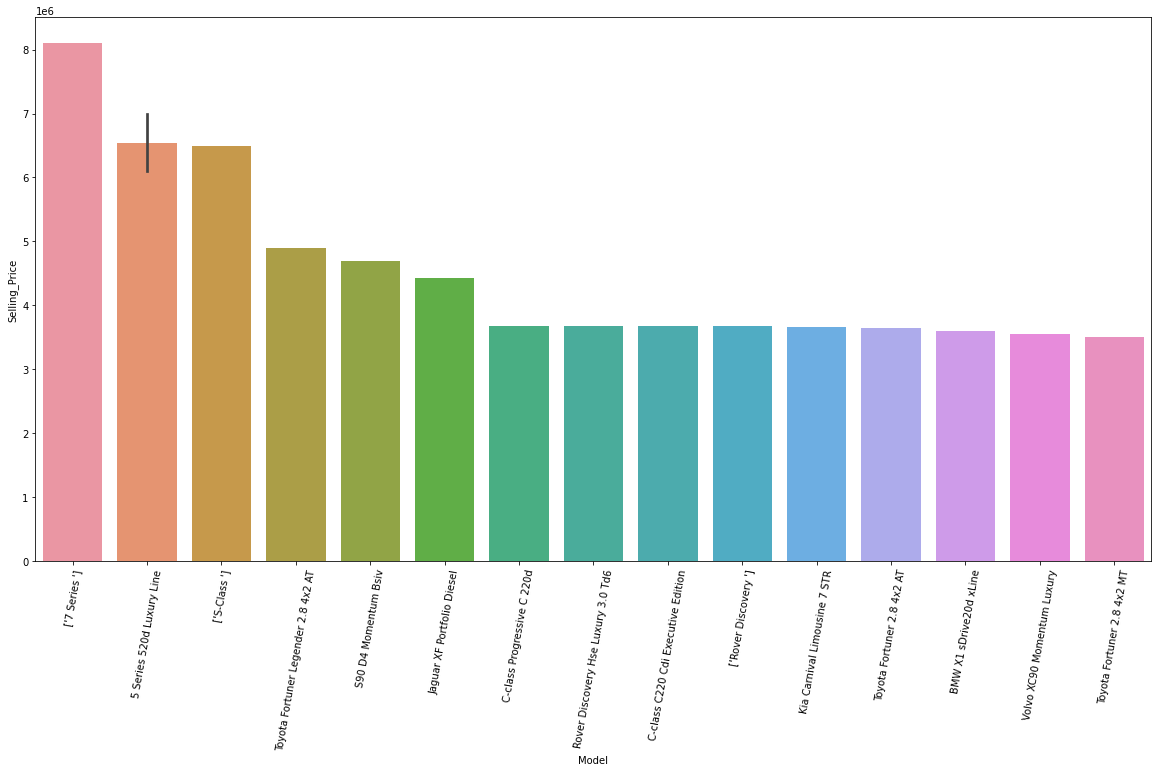

In [266]:
plt.figure(figsize=(20,10))
sns.barplot(x='Model',y='Selling_Price',data=df3.nlargest(30, 'Selling_Price'))
plt.xticks(rotation=80)
plt.show()

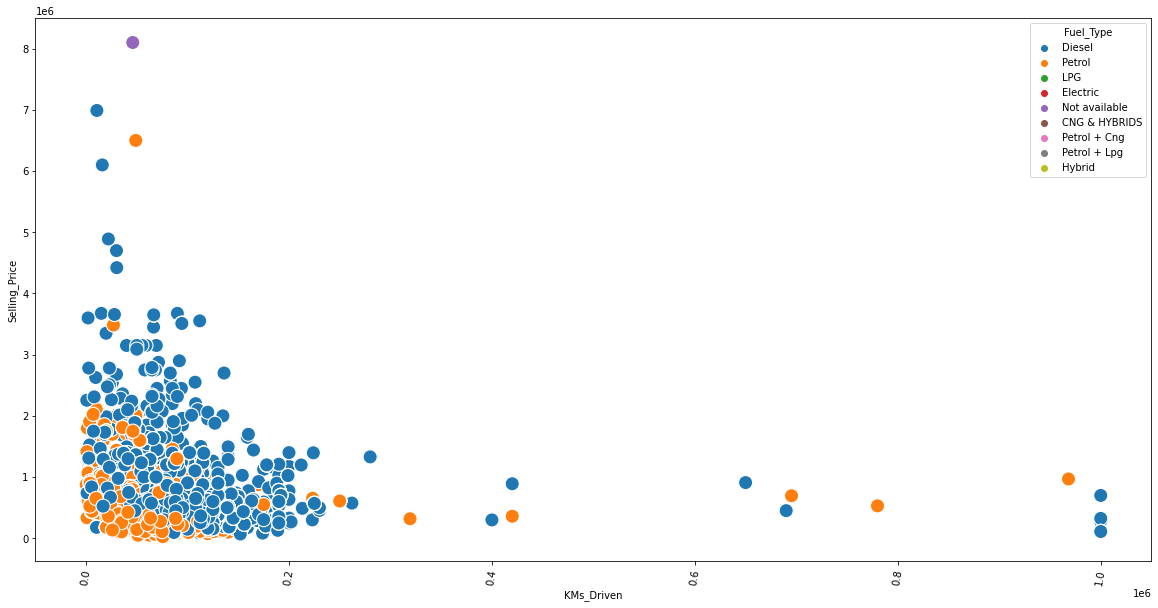

In [267]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='KMs_Driven',y='Selling_Price',hue='Fuel_Type',data=df3,s=200)
plt.xticks(rotation=80)
plt.show()

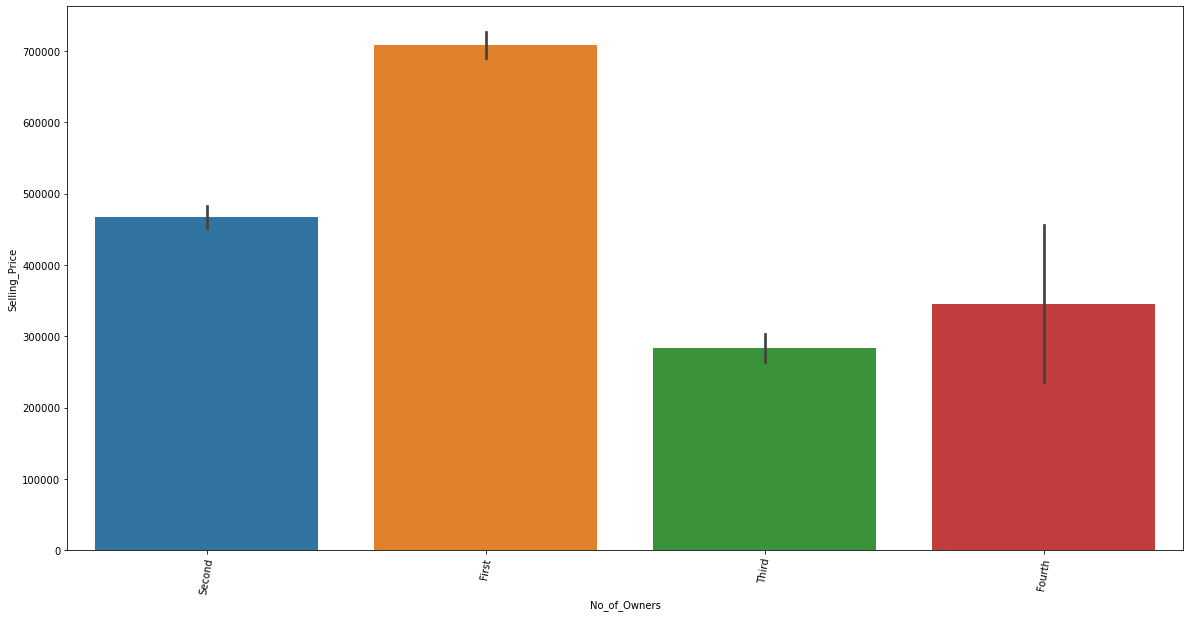

In [268]:
plt.figure(figsize=(20,10))
sns.barplot(x='No_of_Owners',y='Selling_Price',data=df3)
plt.xticks(rotation=80)
plt.show()

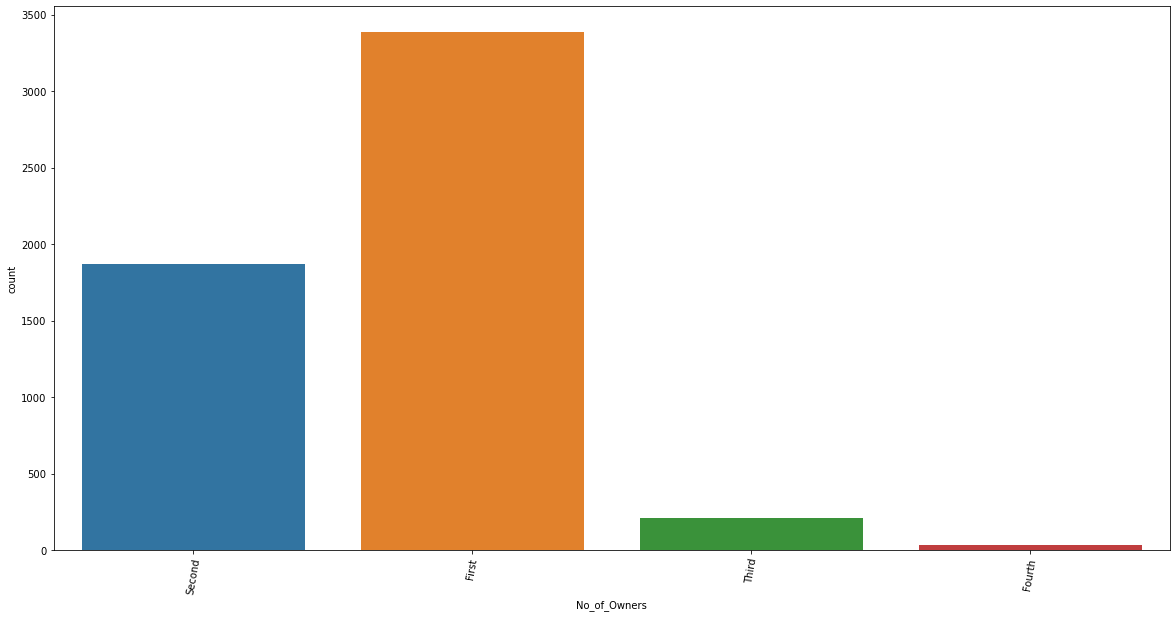

In [269]:
plt.figure(figsize=(20,10))
sns.countplot(x='No_of_Owners',data=df3)
plt.xticks(rotation=80)
plt.show()

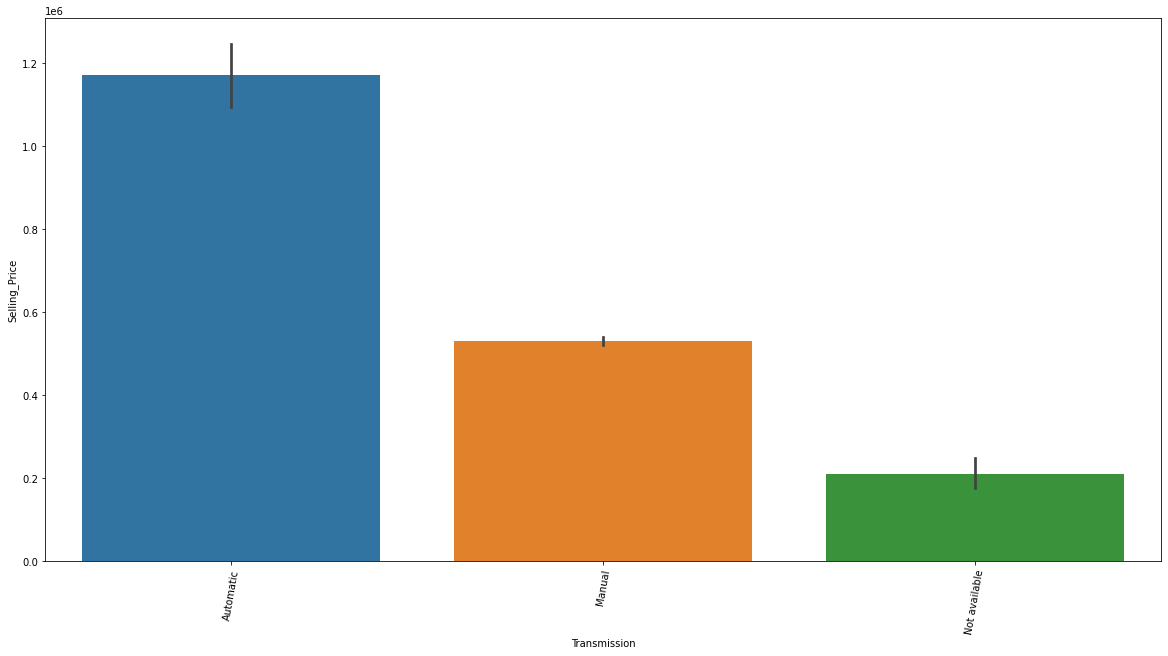

In [270]:
plt.figure(figsize=(20,10))
sns.barplot(x='Transmission',y='Selling_Price',data=df3)
plt.xticks(rotation=80)
plt.show()

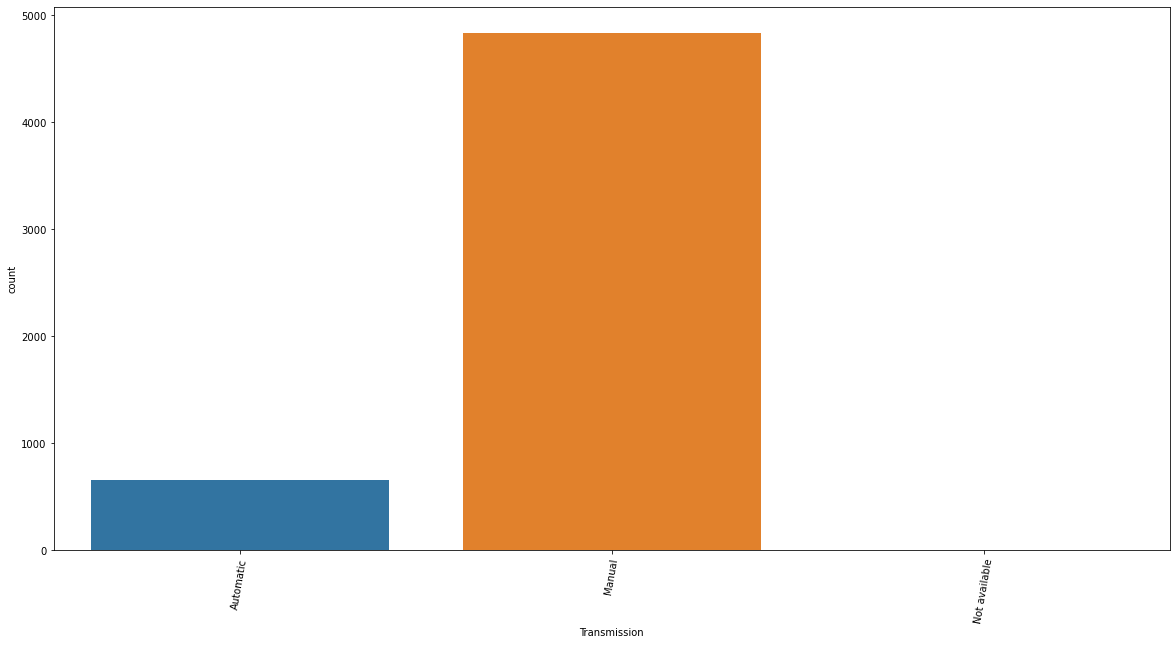

In [271]:
plt.figure(figsize=(20,10))
sns.countplot(x='Transmission',data=df3)
plt.xticks(rotation=80)
plt.show()

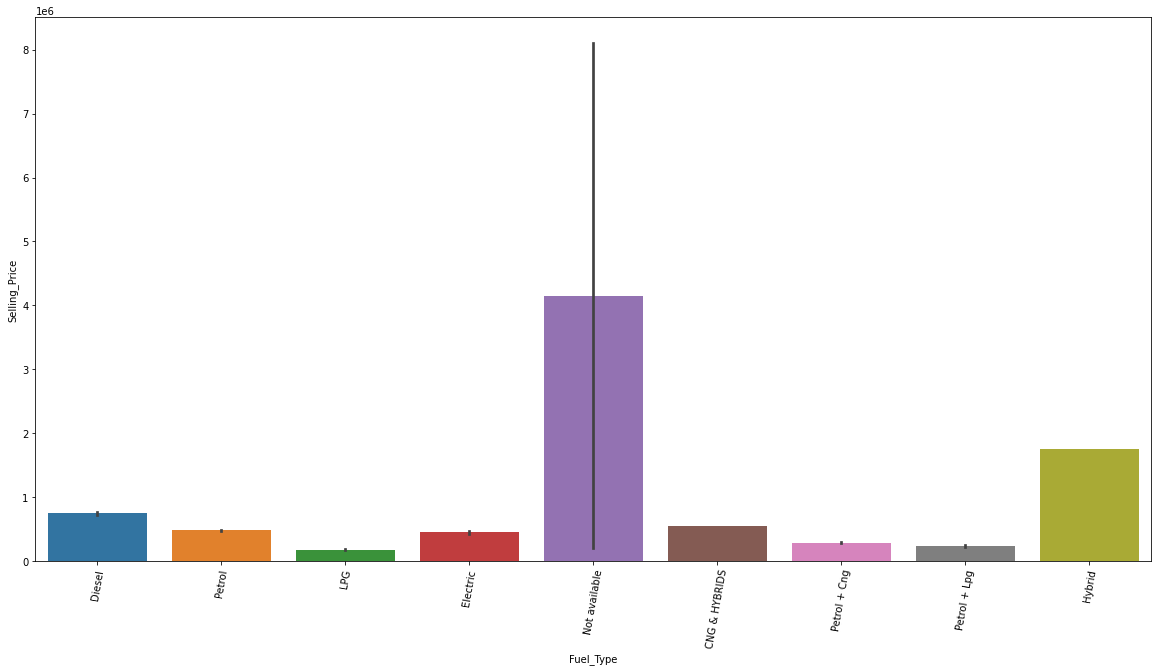

In [272]:
plt.figure(figsize=(20,10))
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df3)
plt.xticks(rotation=80)
plt.show()

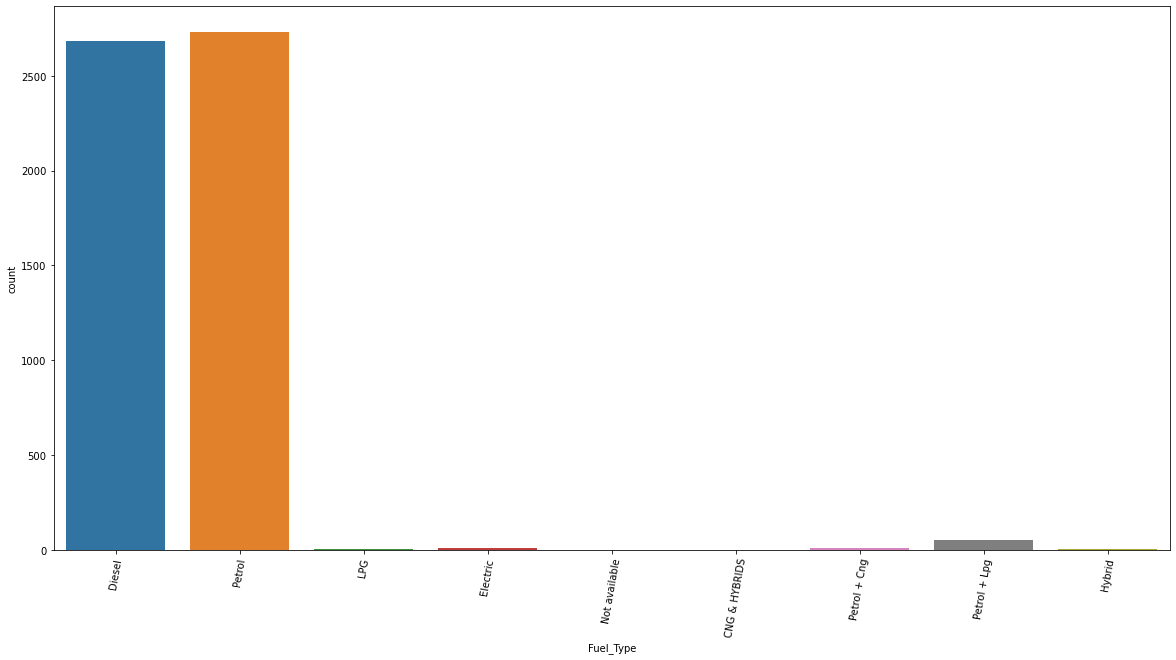

In [273]:
plt.figure(figsize=(20,10))
sns.countplot(x='Fuel_Type',data=df3)
plt.xticks(rotation=80)
plt.show()

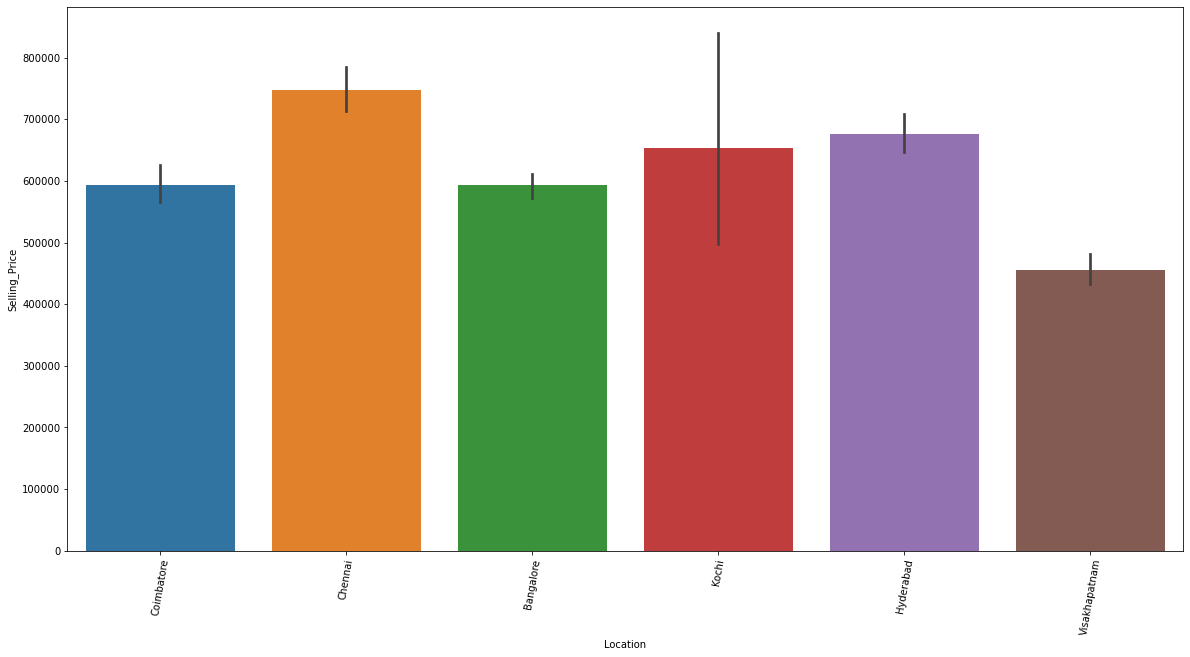

In [276]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3['Location'],y=df3['Selling_Price'],data=df3)
plt.xticks(rotation=80)
plt.show()

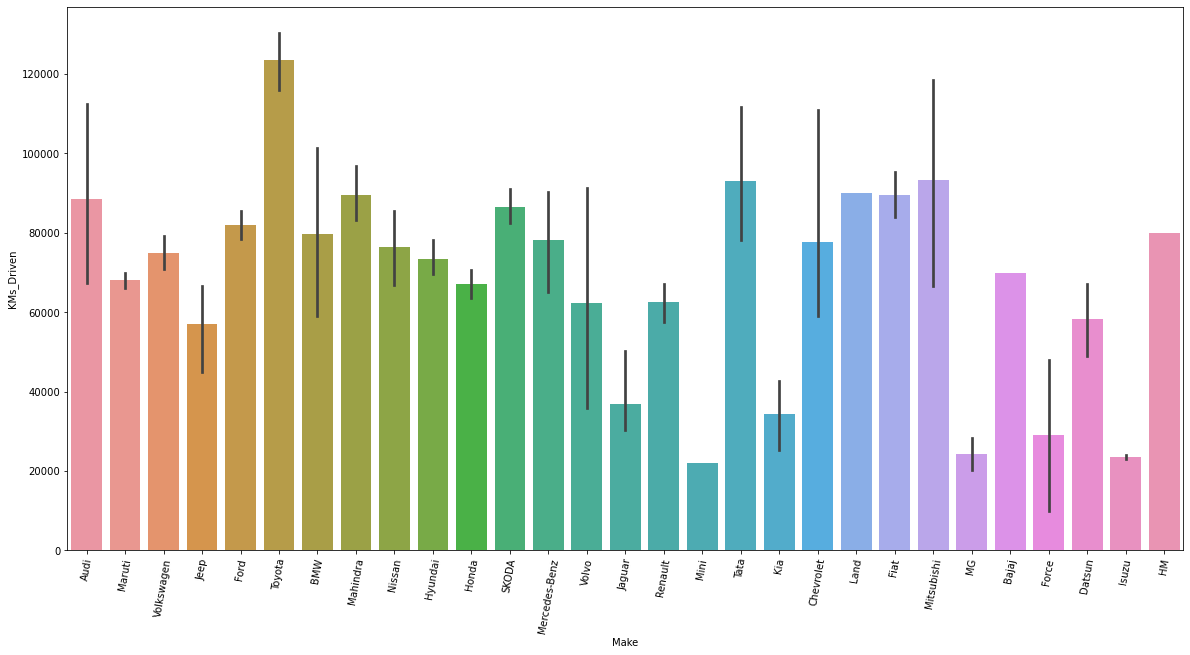

In [275]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3['Make'],y=df3['KMs_Driven'],data=df3)
plt.xticks(rotation=80)
plt.show()

In [279]:
df3.columns

Index(['Registration_Year', 'Make', 'Model', 'KMs_Driven', 'No_of_Owners',
       'Transmission', 'Fuel_Type', 'Location', 'Selling_Price'],
      dtype='object')

In [280]:
Columns,Datatype,Unique_values,Mode_Mean = [],[],[],[]
for i in df3.columns:
    Datatype.append(df3[i].dtype)
    Columns.append(i)
    Unique_values.append(df3[i].nunique())
    if df[i].dtype == 'object':
        Mode_Mean.append(df3[i].mode())
    else:
        Mode_Mean.append(df3[i].mean())

In [281]:
Dataset = pd.DataFrame(zip(Columns,Datatype,Unique_values,Mode_Mean),columns=('Columns','Datatype','Unique_values','Mode_Mean'))

In [282]:
Dataset

,Columns,Datatype,Unique_values,Mode_Mean
0,Registration_Year,int64,28,2013.56283
1,Make,object,29,0 Maruti dtype: object
2,Model,object,1155,0 Maruti Suzuki Swift VXi dtype: object
3,KMs_Driven,int64,629,77207.429351
4,No_of_Owners,object,4,0 First dtype: object
5,Transmission,object,3,0 Manual dtype: object
6,Fuel_Type,object,9,0 Petrol dtype: object
7,Location,object,6,0 Coimbatore dtype: object
8,Selling_Price,int32,805,607882.439353


In [214]:
category = ['Make', 'Model', 'No_of_Owners', 'Transmission', 'Fuel_Type',
       'Location']

In [215]:
lab = LabelEncoder()
for i in category:
    df3[i] = lab.fit_transform(df3[i])

print(df3.dtypes)

Registration_Year    int64
Make                 int32
Model                int32
KMs_Driven           int64
No_of_Owners         int32
Transmission         int32
Fuel_Type            int32
Location             int32
Selling_Price        int32
dtype: object


In [217]:
df3.corr()

,Registration_Year,Make,Model,KMs_Driven,No_of_Owners,Transmission,Fuel_Type,Location,Selling_Price
Registration_Year,1.000000,0.120115,0.068451,-0.259711,-0.411600,-0.191911,-0.103976,-0.078720,0.506935
Make,0.120115,1.000000,0.818255,0.078209,-0.089100,-0.050613,-0.177270,0.044336,0.116107
Model,0.068451,0.818255,1.000000,0.105593,-0.054226,-0.023753,-0.141056,0.039095,0.081622
KMs_Driven,-0.259711,0.078209,0.105593,1.000000,0.177636,0.077304,-0.263165,0.082831,-0.099158
No_of_Owners,-0.411600,-0.089100,-0.054226,0.177636,1.000000,0.103404,-0.026177,0.072899,-0.260134
Transmission,-0.191911,-0.050613,-0.023753,0.077304,0.103404,1.000000,-0.037079,0.061494,-0.414516
Fuel_Type,-0.103976,-0.177270,-0.141056,-0.263165,-0.026177,-0.037079,1.000000,-0.085222,-0.270980
Location,-0.078720,0.044336,0.039095,0.082831,0.072899,0.061494,-0.085222,1.000000,-0.102177
Selling_Price,0.506935,0.116107,0.081622,-0.099158,-0.260134,-0.414516,-0.270980,-0.102177,1.000000


<AxesSubplot:>

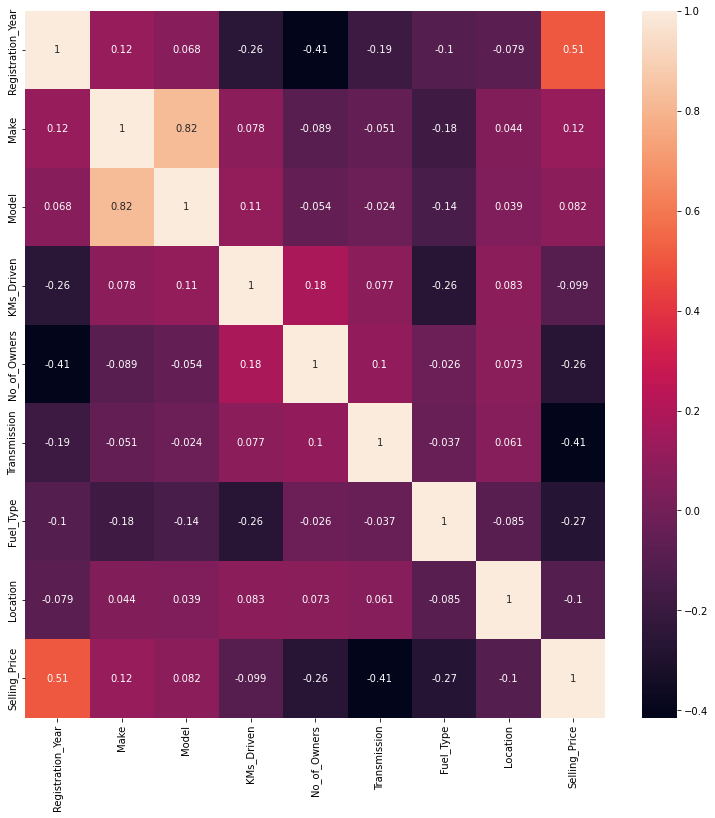

In [218]:
plt.figure(figsize=(13,13))
sns.heatmap(df3.corr(),annot=True)

In [219]:
for i in df3.columns:
    Q1,Q3 = np.percentile(df3[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df3[(df3[i] < lower_range) | (df3[i] > upper_range)]

In [220]:
df_no_outliers.shape

(310, 9)

In [221]:
z = np.abs(zscore(df3))
threshold = 3
print(np.where(z<3))
print(df3.shape)

(array([   0,    0,    0, ..., 5498, 5498, 5498], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))
(5499, 9)


In [222]:
df_new = df3[(z<3).all(axis = 1)]
df_new.shape

(5341, 9)

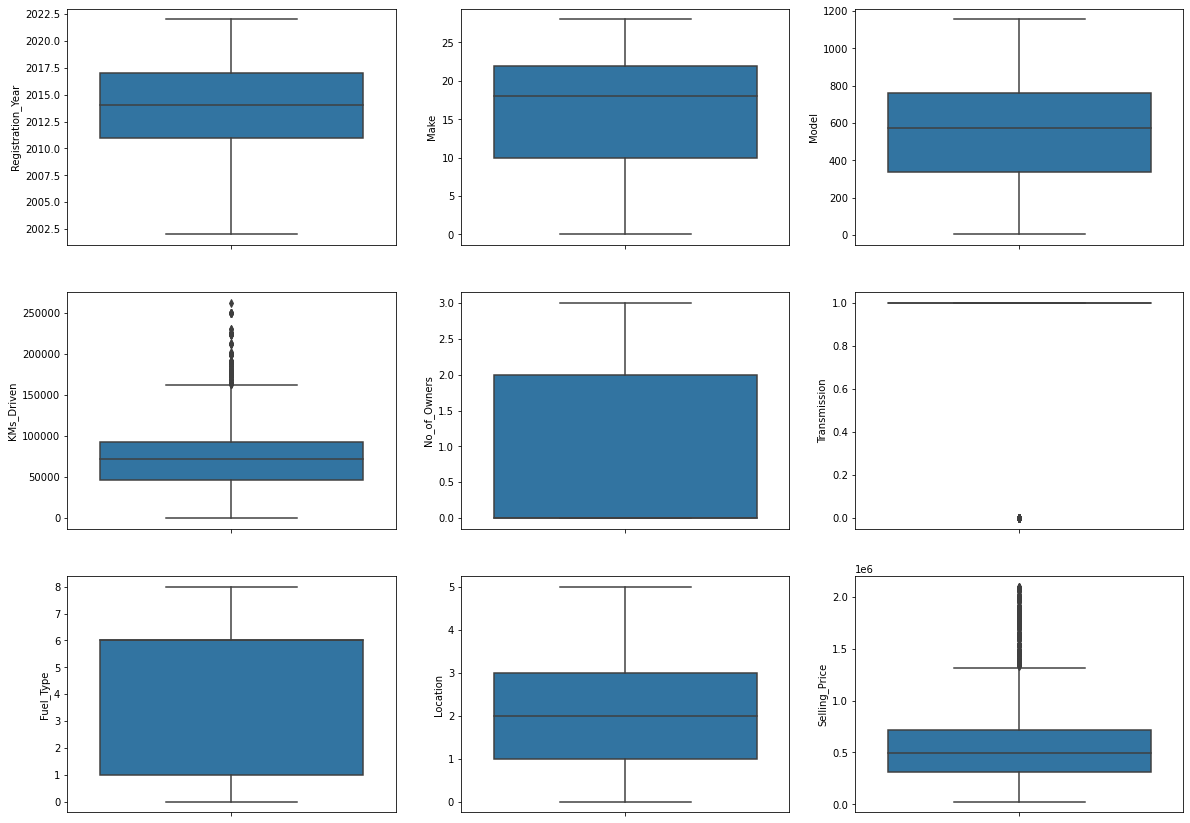

In [223]:
count=1
plt.subplots(figsize=(20, 20))
for i in df_new.columns:
    plt.subplot(4,3,count)
    sns.boxplot(y=df_new[i])
    
    count+=1

plt.show()

In [225]:
df3.skew()

Registration_Year   -0.427523
Make                -0.104176
Model                0.030759
KMs_Driven           7.855760
No_of_Owners         0.611397
Transmission        -2.271122
Fuel_Type           -0.012201
Location             0.393728
Selling_Price        4.119167
dtype: float64

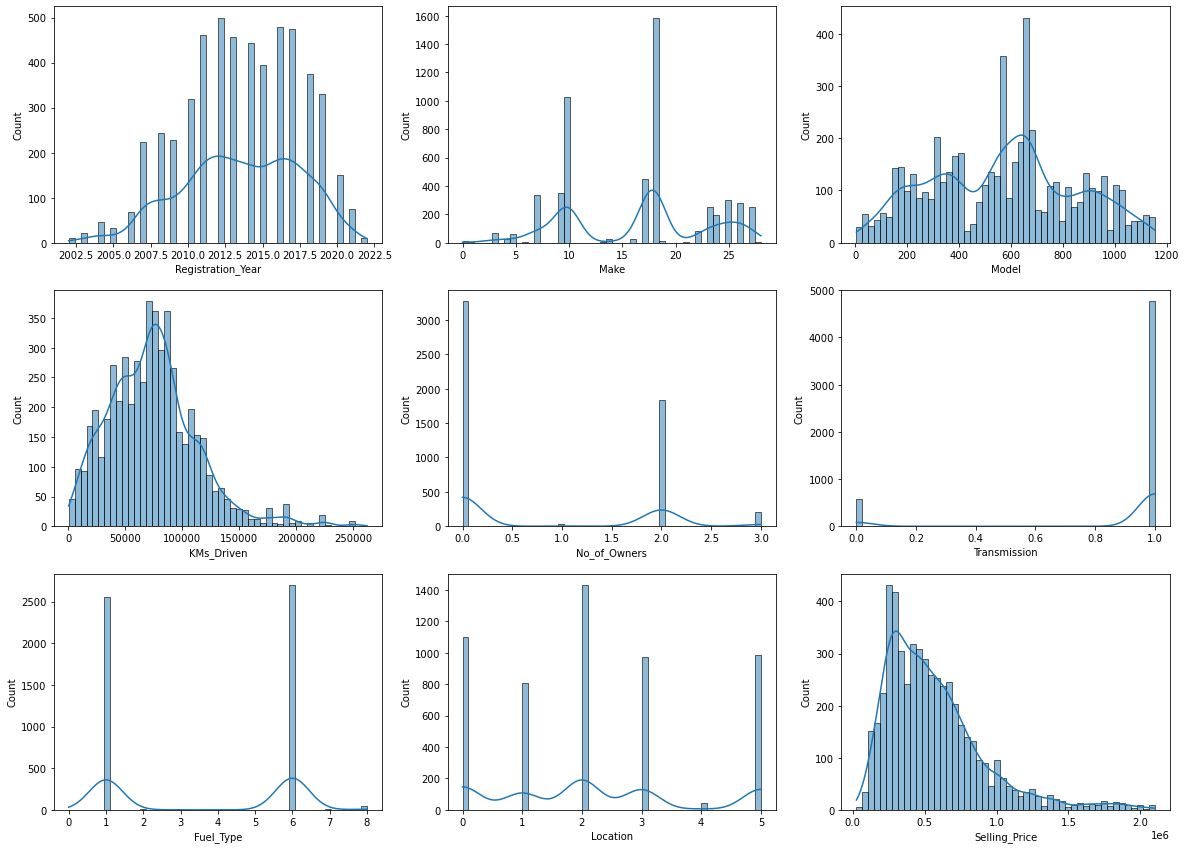

In [224]:
count=1
plt.subplots(figsize=(20, 20))
for i in df_new.columns:
    plt.subplot(4,3,count)
    sns.histplot(df_new[i], kde = True, bins = 50, label = df_new.skew())
    
    count+=1

plt.show()

In [226]:
df_new.columns

Index(['Registration_Year', 'Make', 'Model', 'KMs_Driven', 'No_of_Owners',
       'Transmission', 'Fuel_Type', 'Location', 'Selling_Price'],
      dtype='object')

In [227]:
X = df_new.drop(['Selling_Price'],axis=1)
y = df_new['Selling_Price']

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [230]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.5215592301926388
R2 score for the random state is 42 is 0.762515204149353
R2 score for the random state is 42 is 0.4074075157905078
R2 score for the random state is 42 is 0.7634367401951112
R2 score for the random state is 42 is 0.7284233113426093
R2 score for the random state is 42 is 0.8506582886473463
R2 score for the random state is 42 is 0.8539195614293481
R2 score for the random state is 43 is 0.5209940878658585
R2 score for the random state is 43 is 0.7700996444529461
R2 score for the random state is 43 is 0.47873936281027885
R2 score for the random state is 43 is 0.8455677053721486
R2 score for the random state is 43 is 0.7511944089513357
R2 score for the random state is 43 is 0.8764609393279461
R2 score for the random state is 43 is 0.898645580117087
R2 score for the random state is 44 is 0.49678696550206136
R2 score for the random state is 44 is 0.7468663242258924
R2 score for the random state is 44 is 0.3813715638409203
R2 score for t

R2 score for the random state is 62 is 0.42334742850807594
R2 score for the random state is 62 is 0.7840866452759848
R2 score for the random state is 62 is 0.735709534899034
R2 score for the random state is 62 is 0.8592366446941909
R2 score for the random state is 62 is 0.8509030704871599
R2 score for the random state is 63 is 0.5011768413931386
R2 score for the random state is 63 is 0.7814340679867557
R2 score for the random state is 63 is 0.3866265660163042
R2 score for the random state is 63 is 0.7923873922879473
R2 score for the random state is 63 is 0.7408257012656294
R2 score for the random state is 63 is 0.8655409904923124
R2 score for the random state is 63 is 0.8883398692127797
R2 score for the random state is 64 is 0.503911123953904
R2 score for the random state is 64 is 0.7886943553988353
R2 score for the random state is 64 is 0.3937111335793544
R2 score for the random state is 64 is 0.7974886514711388
R2 score for the random state is 64 is 0.7435906612656289
R2 score for th

R2 score for the random state is 82 is 0.7284341928148086
R2 score for the random state is 82 is 0.8578172590182125
R2 score for the random state is 82 is 0.8570724467778696
R2 score for the random state is 83 is 0.530164594603398
R2 score for the random state is 83 is 0.7761757787843574
R2 score for the random state is 83 is 0.4048259590694052
R2 score for the random state is 83 is 0.7909200317631934
R2 score for the random state is 83 is 0.7875213634688699
R2 score for the random state is 83 is 0.883246950763172
R2 score for the random state is 83 is 0.8869985239957869
R2 score for the random state is 84 is 0.5133013979765283
R2 score for the random state is 84 is 0.778160915831018
R2 score for the random state is 84 is 0.47369266104079466
R2 score for the random state is 84 is 0.8182795316574316
R2 score for the random state is 84 is 0.756131722134759
R2 score for the random state is 84 is 0.872279936855239
R2 score for the random state is 84 is 0.87971047470277
R2 score for the ran

In [231]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [232]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [233]:
RFR=RandomForestRegressor()
RandomizedSearch_RFR=RandomizedSearchCV(estimator=RFR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=67,n_jobs=-1)
RandomizedSearch_RFR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=67, verbose=2)

In [234]:
RandomizedSearch_RFR.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230}

In [235]:
RandomizedSearch_RFR.best_estimator_

RandomForestRegressor(max_depth=230, max_features='log2', n_estimators=900)

In [283]:
RFR = RandomForestRegressor(n_estimators=900,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=230,random_state=67)
RFR.fit(X_train,y_train)
pred = RFR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 88.5718027742514


In [237]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  43667.17472188806
Mean squared Error:  14141070734.25445
Root Mean Absolute Error:  208.96692255447527


Text(0, 0.5, 'Predicted_Y')

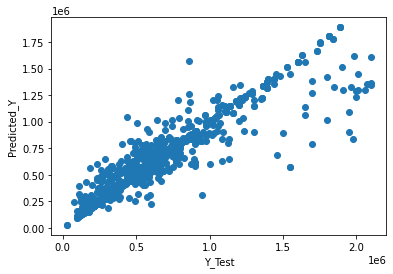

In [238]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

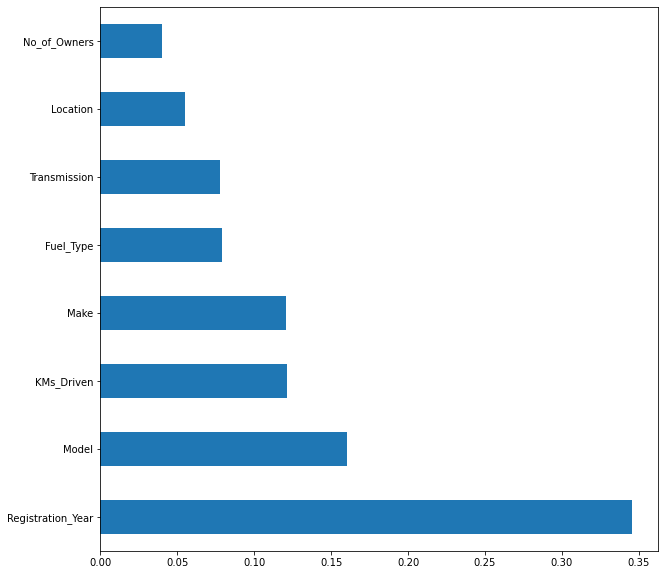

In [239]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(RFR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

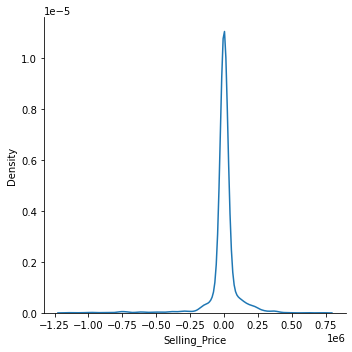

In [285]:
import seaborn as sns
reg_pred=RFR.predict(X_test)
sns.displot(reg_pred-y_test,kind='kde')

### Pipeline with 5 features

In [240]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lr_regressor',LinearRegression())])

In [241]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_regressor',RandomForestRegressor())])

In [242]:
pipelines = [pipeline_lr, pipeline_dt]

In [243]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [244]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [245]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 81.62227372142998
